# Bike sharing excercise approach 2

##### For this excerice I have used the hour.csv file from the Bikesharing datasets link: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

## Importing Warning Library to ignore warnings from displaying
import warnings
warnings.filterwarnings('ignore')

## Importing StatsModel Library for displaying detailed information about model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

##Importing Scikit Library for evaluating requirement specific parameters and performing preprocessing steps (like Splitting & Scaling)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

## Other Misc Libraries (needed at runtime)¶
import datetime
from scipy.stats import pearsonr

##  Importing CSV Data from file

In [2]:
raw_data = pd.read_csv('hour.csv', index_col='instant')

## Printing CSV Data shape

In [3]:
data_import_shape = raw_data.shape
data_import_shape

(17379, 16)

In [4]:
raw_data.head(7)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2


## Informotion dataset attributes


 - <b> "instant" </b>: record index
 - <b> "dteday" </b> : date
 - <b> "season" </b> : season (1: winter, 2: spring, 3: summer, 4: fall)
 - <b> "yr" </b> : year (0: 2011, 1: 2012)
 - <b> "mnth" </b> : month ( 1: January to 12: December)
 - <b> "hr" </b> : hour (0 to 23)
 - <b> "holiday" </b> : whether day is holiday (1) or not (0)
 - <b> "weekday"</b> : day of the week (0: Sunday to 6: Saturday)
 - <b> "workingday" </b> : if day is neither weekend nor holiday (1), otherwise is (0).
 - <b> "weathersit" :</b>
        1 = Clear, Few clouds, Partly cloudy, Partly cloudy
        2 =  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3 =  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4 =  Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 - <b> "temp" </b> : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
 - <b> "atemp" </b> : Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
 - <b> "hum" </b> : Normalized humidity. The values are divided to 100 (max)
 - <b> "windspeed" </b> " : Normalized wind speed. The values are divided to 67 (max)
 - <b> "casual" </b> : count of casual users
 - <b> "registered" </b> : count of registered users
 - <b> "cnt" </b> : count of total rental bikes including both casual and registered Information dataset attributs

## Checking for Null Values

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


##### No Null value found in any column

# Data Preparation

##### Defining set of fucntions which can be useful to plot graph  / charts

In [6]:
def bar_graph_plot_function(data, graph_title, x_axis_label, y_axis_label, data_label='horizontal', x_label_rotation=0, x_text=None):
    population_graph = sns.barplot(x=data.index, y=data.values)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        population_graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label)       
    if x_text is None:
        population_graph.set_xticklabels(population_graph.get_xticklabels(), rotation=x_label_rotation)
    else:
        population_graph.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

##  Date

In [7]:
raw_data.dteday.describe()

count          17379
unique           731
top       2012-08-26
freq              24
Name: dteday, dtype: object

#### We will check if any of the date range is outside certain limit

In [8]:
raw_data['dteday'].apply(lambda x: int(x.split('-')[0])).describe()

count    17379.000000
mean      2011.502561
std          0.500008
min       2011.000000
25%       2011.000000
50%       2012.000000
75%       2012.000000
max       2012.000000
Name: dteday, dtype: float64

#### We will check if any of the month range is outside certain limit

In [9]:
raw_data['dteday'].apply(lambda x: int(x.split('-')[1])).describe()

count    17379.000000
mean         6.537775
std          3.438776
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: dteday, dtype: float64

#### We will check if any of the year range is outside certain limit

In [10]:
raw_data['dteday'].apply(lambda x: int(x.split('-')[2])).describe()

count    17379.000000
mean        15.683411
std          8.789373
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: dteday, dtype: float64

#### All the range of date, month & year are in the valid range, hence we can proceed ahead with this column without dropping / changing any records

#### On analysing date column we can see that all the attributes of date except for day are comfortably covered under month & year column.
#### So, we will extract only the date part from this column and use it.

In [11]:
raw_data['dteday'] = raw_data['dteday'].apply(lambda x: int(x.split('-')[0]))

#### Also, we will rename the column name from 'dteday' to 'date'

In [12]:
raw_data = raw_data.rename(columns={"dteday": "date"})

#### Let's plot distrubution of Ride Count Mean Across all the days

In [13]:

date_dist = round(raw_data.groupby(by='date').cnt.mean()/1000, 2)

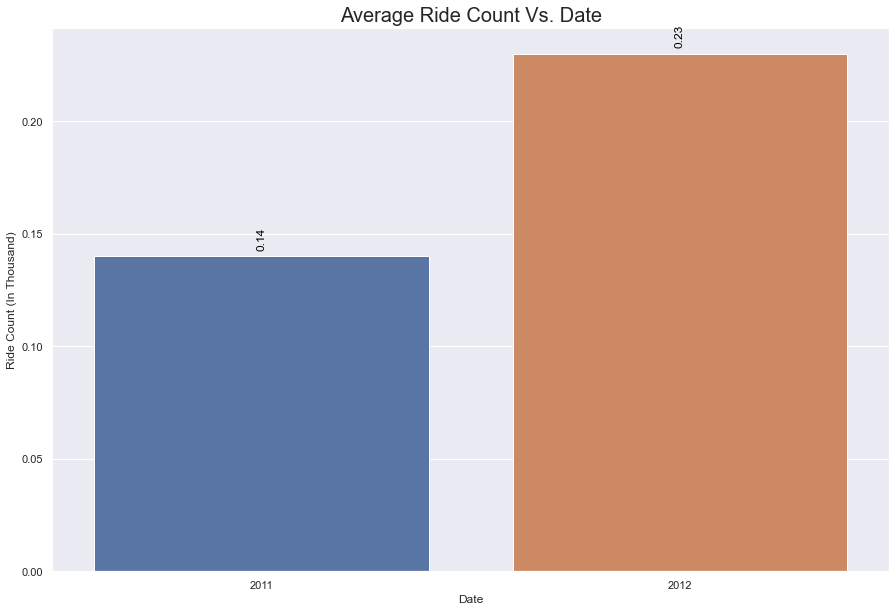

In [14]:
bar_graph_plot_function(data=date_dist, graph_title='Average Ride Count Vs. Date', x_axis_label='Date',
                        y_axis_label='Ride Count (In Thousand)', data_label='vertical', x_label_rotation=0)

#### By simply visualising the Date Column, we dont se any significant impact of this on Ride Count

## Season

In [15]:
raw_data.season.describe()

count    17379.000000
mean         2.501640
std          1.106918
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: season, dtype: float64

#### Season column is varied between 1 to 4 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

#### Season column is categorical column with each value corresponding to specific season.
#### We need to map these numbers to respectie seasons, so that these column values will be further used to generate dummy variable as it is a Categorical Nominal Type Data

#### We should map this column as follows:
- 1: spring
- 2: summer
- 3: fall
- 4: winter

In [16]:
raw_data['season'] = raw_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

#### Let's plot distrubution of Ride Count Mean Across all the Seasons

In [17]:
season_dist = raw_data.groupby(by='season').cnt.mean().sort_values()

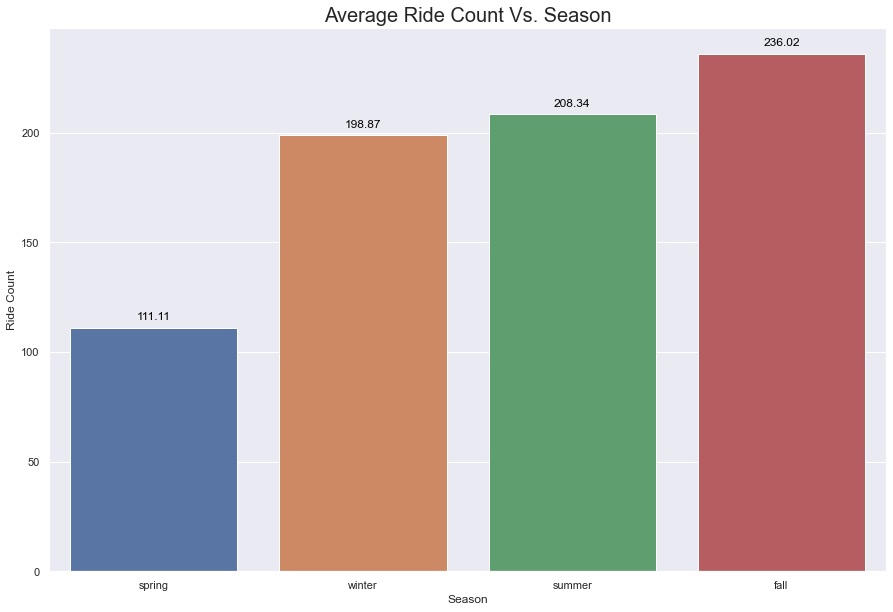

In [18]:
bar_graph_plot_function(data=season_dist, graph_title='Average Ride Count Vs. Season', x_axis_label='Season',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0)

#### We see that, distribution is quite different for respective seasons. This might act as a decisive factor.

## Year

In [19]:
raw_data.yr.describe()

count    17379.000000
mean         0.502561
std          0.500008
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: yr, dtype: float64

#### Year column is varied between 0 and 1 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

#### Year column consist of 2 values with 0 corresponding to 2018 & 1 corresponding to 2019.
#### We will keep this values as it is, because normalising column consisting of only 0 & 1 will have no effect.

#### Let's plot distrubution of Ride Count Mean Year-Wise

In [20]:
year_dist = raw_data.groupby(by='yr').cnt.mean()

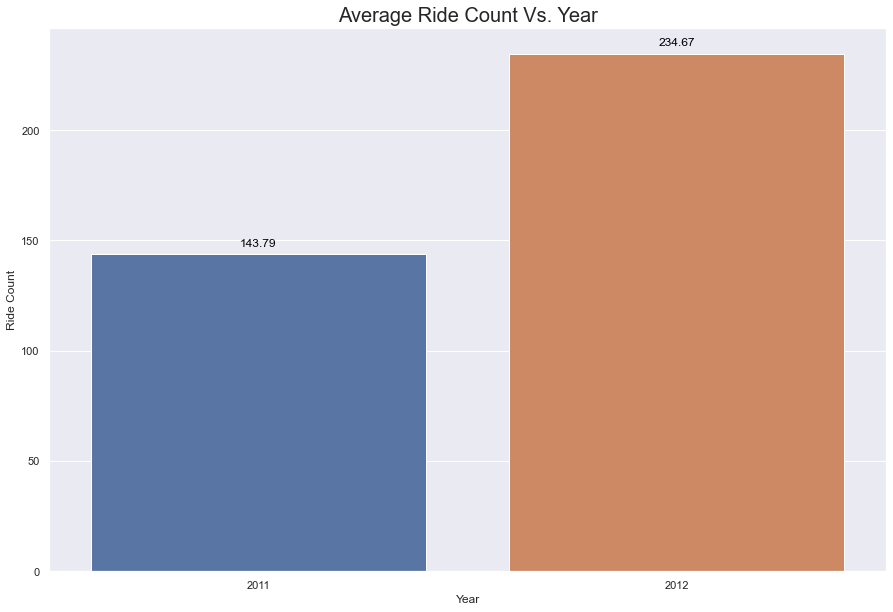

In [21]:

bar_graph_plot_function(data=year_dist, graph_title='Average Ride Count Vs. Year', x_axis_label='Year',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0,
                        x_text=['2011', '2012'])

#### We see that, Ride Count has increases comparatively in 2019 as compared to 2018. This can also be decisive factor for predicting target (output)

## Month

In [22]:
raw_data.mnth.describe()

count    17379.000000
mean         6.537775
std          3.438776
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: mnth, dtype: float64

#### Month column is varied between 1 and 12 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

#### Let's plot distrubution of Ride Count Mean Across all the months

In [23]:
month_dist = raw_data.groupby(by='mnth').cnt.mean()

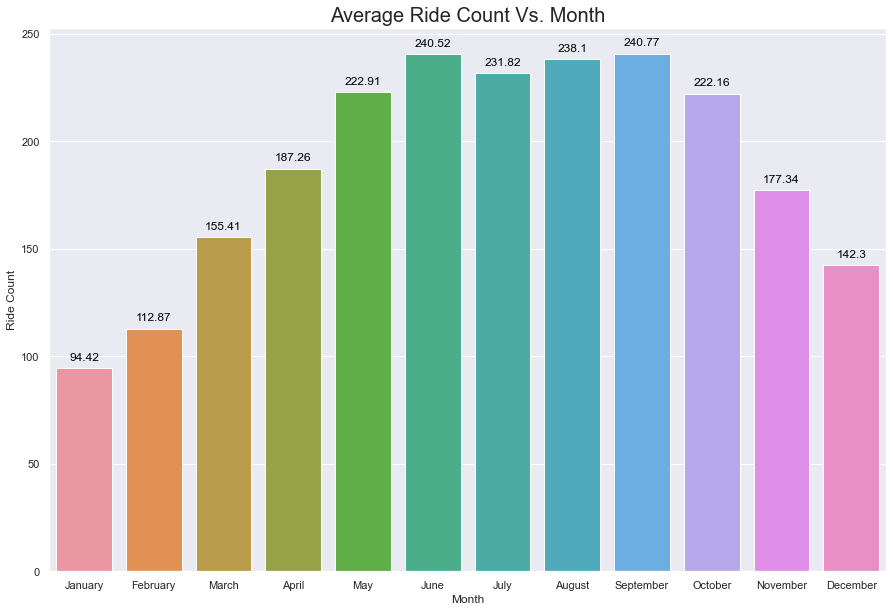

In [24]:
bar_graph_plot_function(data=month_dist, graph_title='Average Ride Count Vs. Month', x_axis_label='Month',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=[datetime.date(1900, i , 1).strftime('%B') for i in range(1, 13)])

#### We see that number of Ride Count drastically increases between May to October , with the highest peaks in  Summer (July & August)

#### Month column is categorical column with each value corresponding to specific month.
#### Mapping numbers to respective Month Name

In [25]:
raw_data.mnth = raw_data.mnth.apply(lambda x: datetime.date(1900, x , 1).strftime('%B'))

## Holiday

In [26]:
raw_data.holiday.describe()

count    17379.000000
mean         0.028770
std          0.167165
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: holiday, dtype: float64

#### Holiday column is varied between 0 and 1 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

#### Let's plot distrubution of Ride Count Mean Across the days which are counted either as holidays or working day

In [27]:
holiday_dist = raw_data.groupby(by='holiday').cnt.mean()

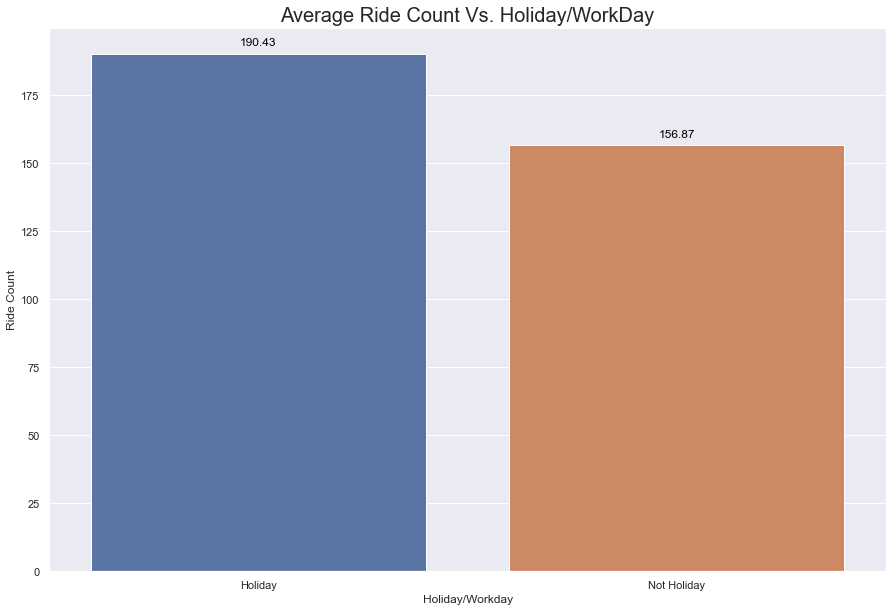

In [28]:
bar_graph_plot_function(data=holiday_dist, graph_title='Average Ride Count Vs. Holiday/WorkDay', x_axis_label='Holiday/Workday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Holiday', 'Not Holiday'])

#### Holiday is a Categorical Nomimal Variable. But there are only 2 values, "Yes" or "No" mapped to "1" & "0" respectively.
#### So, we will leave this as it is.

## Weekday

In [29]:
raw_data.weekday.describe()

count    17379.000000
mean         3.003683
std          2.005771
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: weekday, dtype: float64

#### Weekday column is varied between 1 and 6 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

In [30]:
raw_data.groupby(by='weekday').weekday.count()

weekday
0    2502
1    2479
2    2453
3    2475
4    2471
5    2487
6    2512
Name: weekday, dtype: int64

#### Let's plot distrubution of Ride Count Mean Across the days of weeks (Ex. Sunday, Monday etc.)

In [31]:
weekday_dist = raw_data.groupby(by='weekday').cnt.mean()

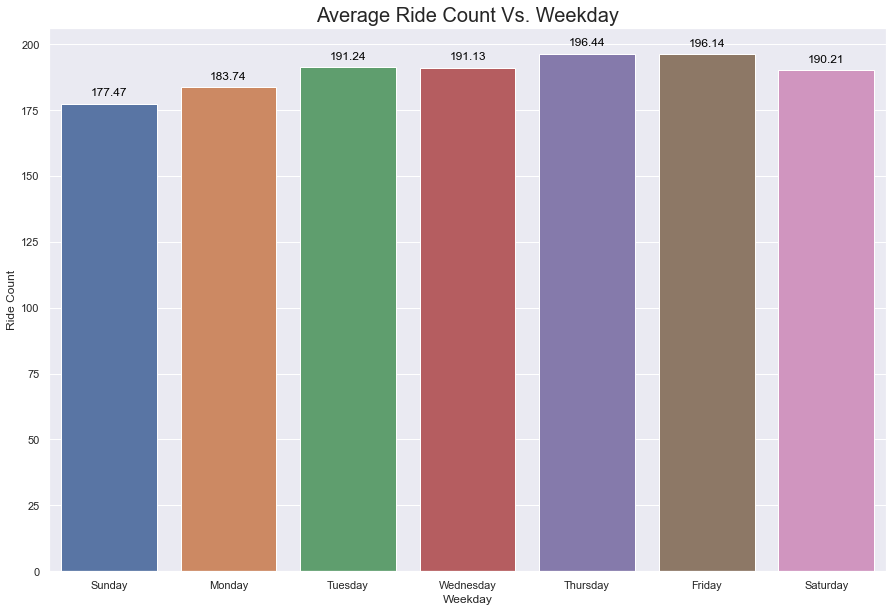

In [32]:
bar_graph_plot_function(data=weekday_dist, graph_title='Average Ride Count Vs. Weekday', x_axis_label='Weekday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [33]:
raw_data['weekday'] = raw_data.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

In [34]:



raw_data.groupby(by='weekday').weekday.count()

weekday
friday       2487
monday       2479
saturday     2512
sunday       2502
thursday     2471
tuesday      2453
wednesday    2475
Name: weekday, dtype: int64

## Working Day

In [35]:
raw_data.workingday.describe()

count    17379.000000
mean         0.682721
std          0.465431
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: workingday, dtype: float64

#### Working Day column is varied between 0 and 1 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

In [36]:
raw_data.groupby(by='workingday').workingday.count()

workingday
0     5514
1    11865
Name: workingday, dtype: int64

#### Working Day is a Categorical Nomimal Variable. But there are only 2 values, "Yes" or "No" mapped to "1" & "0" respectively.
#### So, we will leave this as it is.

#### Let's plot distrubution of Ride Count Mean Across the days which are working days or not

In [37]:
workingday_dist = raw_data.groupby(by='workingday').cnt.mean()

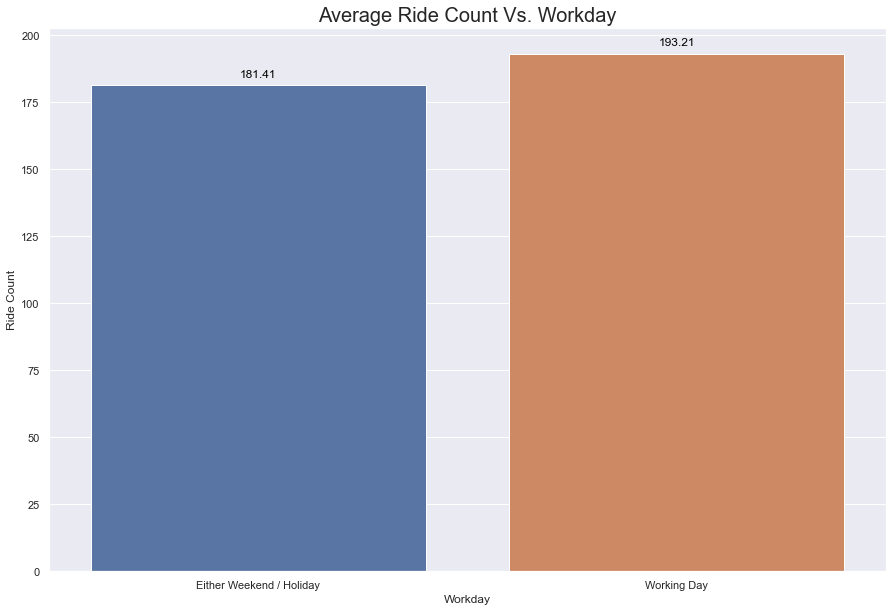

In [38]:
bar_graph_plot_function(data=workingday_dist, graph_title='Average Ride Count Vs. Workday', x_axis_label='Workday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Either Weekend / Holiday', 'Working Day'])

##  Weather Situation

In [39]:
raw_data.weathersit.describe()

count    17379.000000
mean         1.425283
std          0.639357
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: weathersit, dtype: float64

#### Weather Situation column is varied between 1 to 3 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

In [40]:
raw_data.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

#### Weather Situation is a Categorical Nomimal Variable where evry number is mapped as follows:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
#### As per the explanation, we will map each number with a shorter version
- 1: clear
- 2: mist
- 3: light

#### After analysing the column we see that, there are no values corersponding to Heavy Rain. So, after mapping, this value will be completely cancelled out during one hot encoding process.

In [41]:
raw_data['weathersit'] = raw_data.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [42]:
raw_data.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
clear    11413
mist      4544
light     1419
heavy        3
Name: weathersit, dtype: int64

#### Let's plot distrubution of Ride Count Mean Across Weather Situation

In [43]:
weathersit_dist = raw_data.groupby(by='weathersit').cnt.mean()

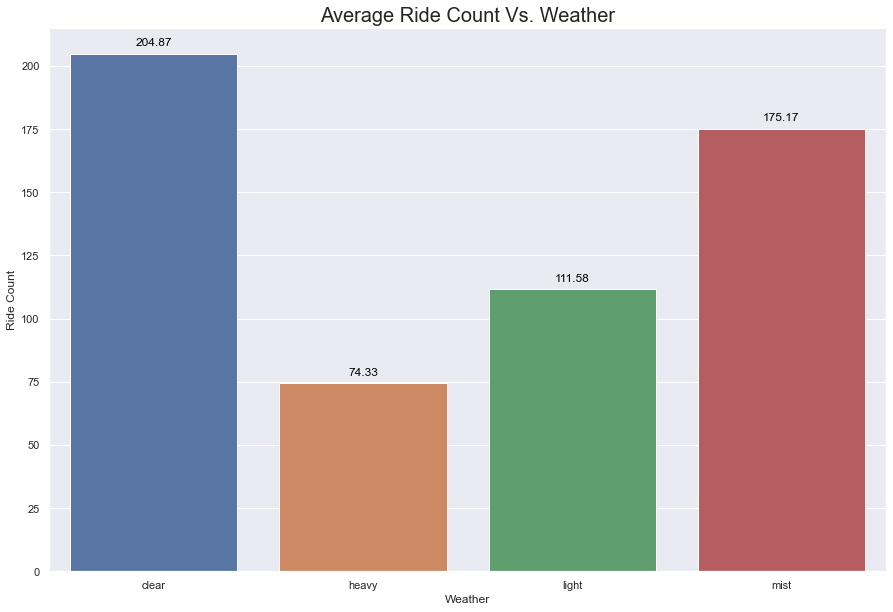

In [44]:
bar_graph_plot_function(data=weathersit_dist, graph_title='Average Ride Count Vs. Weather', x_axis_label='Weather',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0)

##  Temperate & Adjusted Temperature

#### We see that there is high correlation that appears between Temperature & Adjusted Temperature by just visualising the columns

In [45]:
headers = ['Temperature', 'Adjusted Temperature']
pd.DataFrame(np.corrcoef(raw_data['temp'], raw_data["atemp"]), index=headers, columns=headers)    

,Temperature,Adjusted Temperature
Temperature,1.000000,0.987672
Adjusted Temperature,0.987672,1.000000


#### We will go ahead and drop "Adjusted Temperature" column as any one can be dropped since they are highly correlated and provide almost same explanation

In [46]:
raw_data = raw_data.drop(columns=['atemp'])

In [47]:
raw_data.temp.describe()

count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

Text(0.5, 0, 'Temperature')

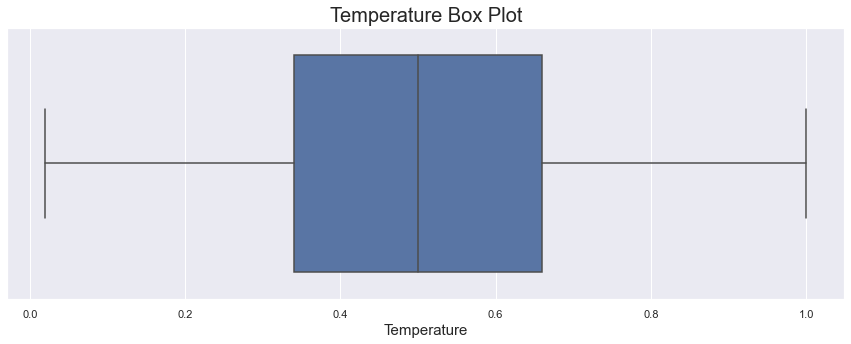

In [48]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=raw_data, x='temp')
plt.title('Temperature Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Temperature', fontdict={'fontsize': 15})

#### Temperature column is varied between a range which seems to be valid range, hence we can proceed ahead with this column without dropping / changing any records.

## Humidity Column

In [49]:
raw_data.hum.describe()

count    17379.000000
mean         0.627229
std          0.192930
min          0.000000
25%          0.480000
50%          0.630000
75%          0.780000
max          1.000000
Name: hum, dtype: float64

Text(0.5, 0, 'Humidity')

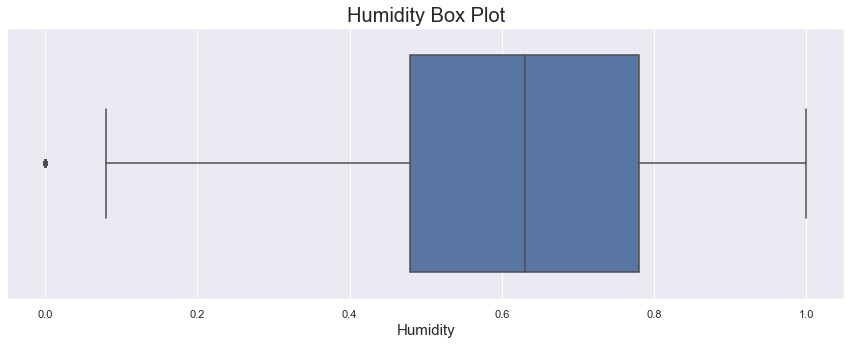

In [50]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=raw_data, x='hum')
plt.title('Humidity Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Humidity', fontdict={'fontsize': 15})

In [51]:
raw_data[raw_data['hum'] == 0]

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1552,2011,spring,0,March,0,0,thursday,1,light,0.34,0.0,0.2537,3,0,3
1553,2011,spring,0,March,1,0,thursday,1,light,0.34,0.0,0.2537,0,2,2
1554,2011,spring,0,March,2,0,thursday,1,light,0.34,0.0,0.2537,0,1,1
1555,2011,spring,0,March,5,0,thursday,1,light,0.36,0.0,0.1940,1,2,3
1556,2011,spring,0,March,6,0,thursday,1,light,0.36,0.0,0.3284,0,12,12
1557,2011,spring,0,March,7,0,thursday,1,light,0.38,0.0,0.2239,1,36,37
1558,2011,spring,0,March,8,0,thursday,1,light,0.38,0.0,0.2836,1,43,44
1559,2011,spring,0,March,9,0,thursday,1,light,0.40,0.0,0.2239,1,23,24
1560,2011,spring,0,March,10,0,thursday,1,light,0.40,0.0,0.1642,0,17,17


#### To check if this a typo or invalid data from source, we will pick 20% of values prior to specific date & 20% of values after the specific date and generate a plot to check the behaviour

In [52]:
humidity_check_df = raw_data[(raw_data.index > int(69*0.8)) & (raw_data.index < int(69*1.2))]
humidity_check_df

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
56,2011,spring,0,January,10,0,monday,1,clear,0.18,0.43,0.2537,11,33,44
57,2011,spring,0,January,11,0,monday,1,clear,0.20,0.40,0.3284,10,41,51
58,2011,spring,0,January,12,0,monday,1,clear,0.22,0.35,0.2985,13,48,61
59,2011,spring,0,January,13,0,monday,1,clear,0.24,0.35,0.2836,8,53,61
60,2011,spring,0,January,14,0,monday,1,clear,0.26,0.30,0.2836,11,66,77
61,2011,spring,0,January,15,0,monday,1,clear,0.26,0.30,0.2537,14,58,72
62,2011,spring,0,January,16,0,monday,1,clear,0.26,0.30,0.2537,9,67,76
63,2011,spring,0,January,17,0,monday,1,clear,0.24,0.30,0.2239,11,146,157
64,2011,spring,0,January,18,0,monday,1,clear,0.24,0.32,0.1045,9,148,157


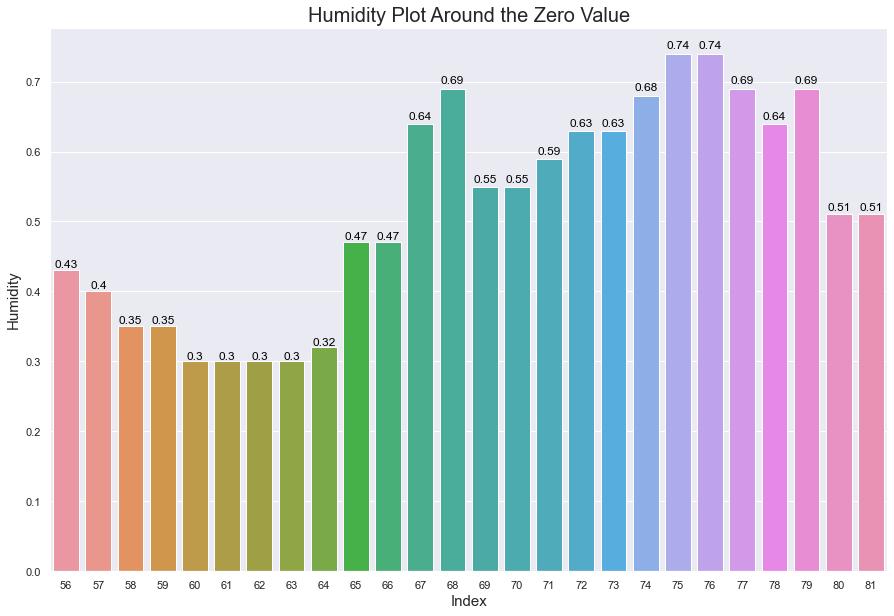

In [53]:
graph = sns.barplot(y=humidity_check_df.hum, x=humidity_check_df.index)
plt.title('Humidity Plot Around the Zero Value', fontdict={'fontsize': 20})
plt.xlabel('Index', fontdict={'fontsize': 15})
plt.ylabel('Humidity', fontdict={'fontsize': 15})
counter = 0
for index, row in humidity_check_df.iterrows():
    graph.text(counter, row.hum*1.01, round(row.hum, 2), color='black', ha="center")
    counter+=1
plt.show()

#### From the above graph we can say that, the value of humidity as 0 should be adjusted as humidity if 0 is practically impossible. This could have been possible during recording the data if not done properly.
#### This can be done by taking numerical mean of all the records before and after this value upto a specifc range making to make sure there is no abrupt change in the season that will again deem oour redicted value to be wrong.

#### Imputing the mean value at the zero humidity level

In [54]:
mean_value = humidity_check_df.hum.mean()
mean_value

0.518076923076923

#### Validating if the imputed value is present or not?

In [55]:
raw_data[raw_data.hum < 10]

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011,spring,0,January,0,0,saturday,0,clear,0.24,0.81,0.0000,3,13,16
2,2011,spring,0,January,1,0,saturday,0,clear,0.22,0.80,0.0000,8,32,40
3,2011,spring,0,January,2,0,saturday,0,clear,0.22,0.80,0.0000,5,27,32
4,2011,spring,0,January,3,0,saturday,0,clear,0.24,0.75,0.0000,3,10,13
5,2011,spring,0,January,4,0,saturday,0,clear,0.24,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012,spring,1,December,19,0,monday,1,mist,0.26,0.60,0.1642,11,108,119
17376,2012,spring,1,December,20,0,monday,1,mist,0.26,0.60,0.1642,8,81,89
17377,2012,spring,1,December,21,0,monday,1,clear,0.26,0.60,0.1642,7,83,90


In [56]:
humidity_check_post_df = raw_data[(raw_data.index > int(69*0.8)) & (raw_data.index < int(69*1.2))]
humidity_check_post_df

,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
56,2011,spring,0,January,10,0,monday,1,clear,0.18,0.43,0.2537,11,33,44
57,2011,spring,0,January,11,0,monday,1,clear,0.20,0.40,0.3284,10,41,51
58,2011,spring,0,January,12,0,monday,1,clear,0.22,0.35,0.2985,13,48,61
59,2011,spring,0,January,13,0,monday,1,clear,0.24,0.35,0.2836,8,53,61
60,2011,spring,0,January,14,0,monday,1,clear,0.26,0.30,0.2836,11,66,77
61,2011,spring,0,January,15,0,monday,1,clear,0.26,0.30,0.2537,14,58,72
62,2011,spring,0,January,16,0,monday,1,clear,0.26,0.30,0.2537,9,67,76
63,2011,spring,0,January,17,0,monday,1,clear,0.24,0.30,0.2239,11,146,157
64,2011,spring,0,January,18,0,monday,1,clear,0.24,0.32,0.1045,9,148,157


#### So, we have adjusted the zero (or missing) value of Humidity successfully.

##  Windspeed Column

In [57]:
raw_data.windspeed.describe()

count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

#### Wind speed seems to be in legitimate range, hence we can proceed ahead with this column without dropping / changing any records

##  Casual, Registered Count & Total Count

#### Our aim for this assignment is to predict the final count (irrespective of casual & registered count)
#### As these columns are not required, we will go ahead dropping these.

In [58]:
raw_data = raw_data.drop(columns=['casual', 'registered'])

##### Here, we complete proper data transformation of required columns and also dropping the columns which are are redundant and are of no use in predicting outcome

## Pair-plots

##### We will create a Pairplot to get an overal gist of the entire data set.
##### But, since many of the columns are alredy mapped to some category, we will import the csv file again and do a few altercations confined to pair-plot graph only

In [59]:
pair_plot_data = pd.read_csv('hour.csv', index_col='instant')

In [60]:
pair_plot_data.head(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8


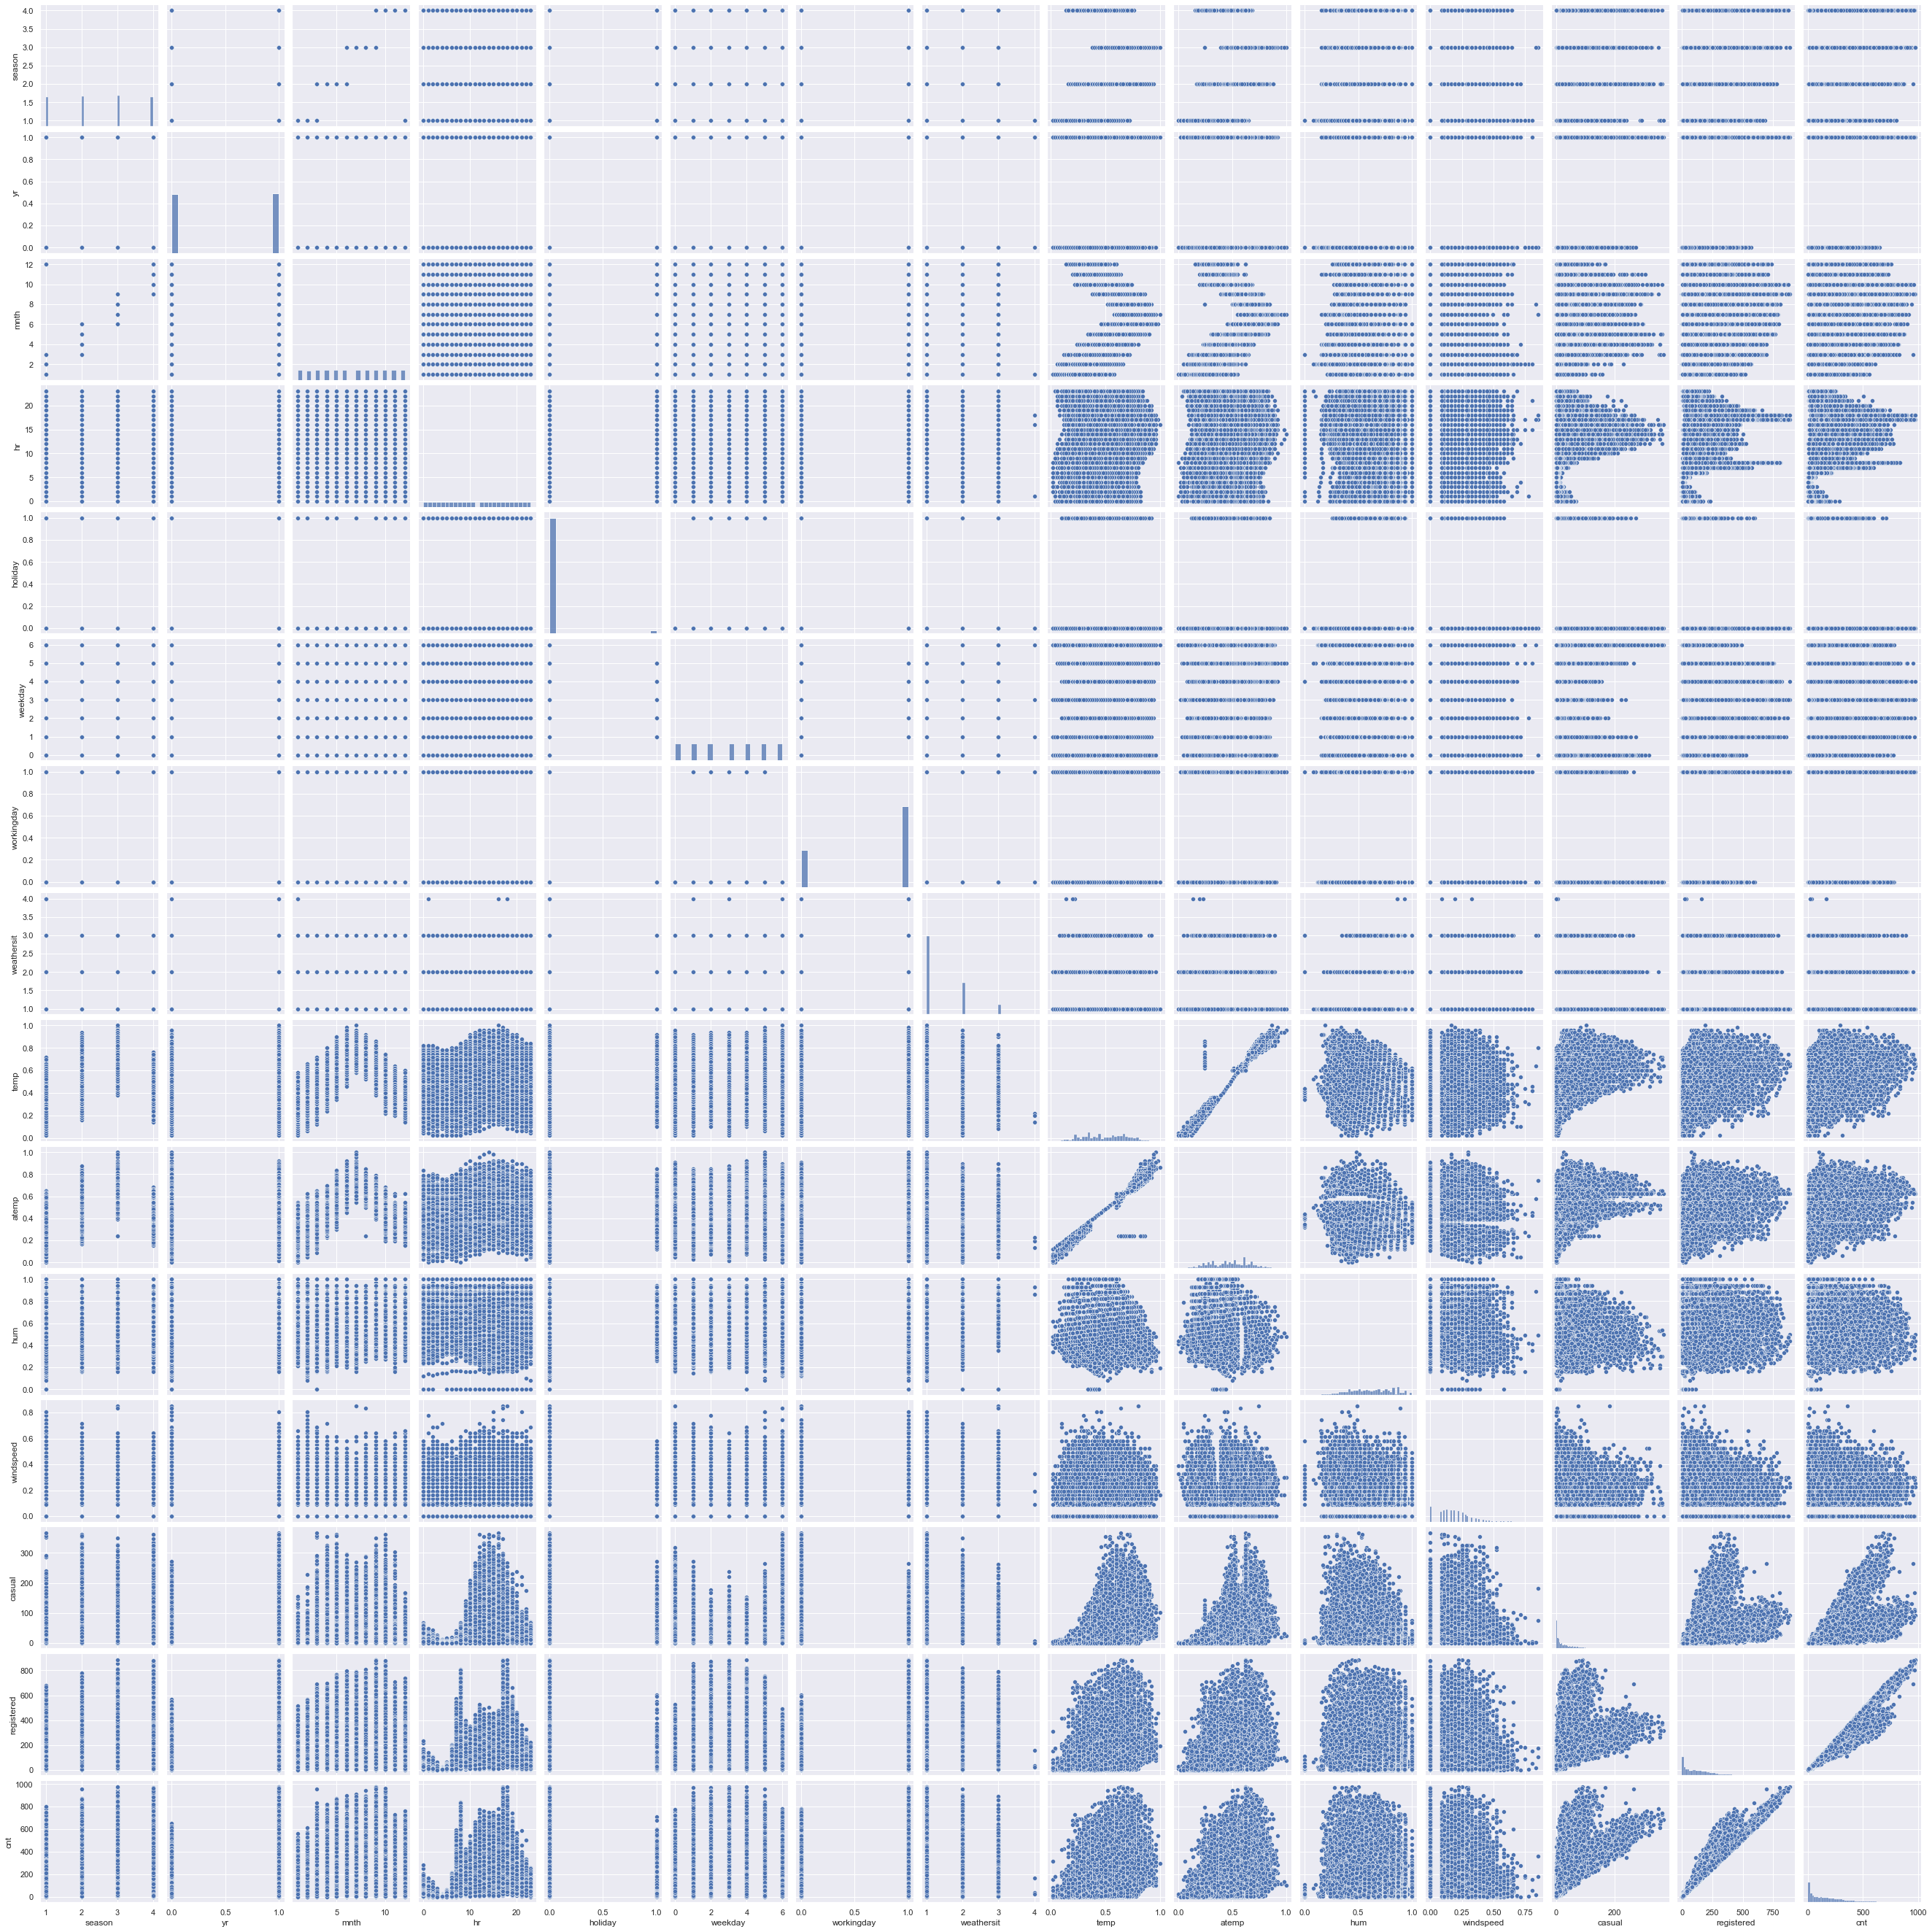

In [61]:
sns.pairplot(pair_plot_data)

**Following are the few assumptions that can hold up from the pairplot with respect to Count as Target Variable:**
- Date Column seems to be scattered evenly across all the points. Unable to make out any pattern when predicting Ride Count from the Date column alone.
- Cnt Seems to be in maximum in Fall (Autumn) followed by Summer, Spring & Winter respectively.
- Cnt has increased drastically in 2019 as compared to 2018
- Cnt seems to increase between May to October which are comparatively Fall(Autumn) & Summer Season in US
- Cnt is lesser on Holidays as compared to other days.
- Working Day / Non-Working Day shows almost similar behaviour (after just visualising the data)
- Cnt is more on Clear & Misty Days as compared to Light Snow / Rainfall
- Cnt seems to be very much lienarly dependent on Temperature
- Humidity & windspeed does not indicate any specific behaviour on just visualising the data.
pair_plot_data.head(10)


In [62]:
pair_plot_data.head(2)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [63]:
bikes = pd.read_csv('hour.csv', index_col='instant')

In [64]:
bikes.head(1)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


In [66]:
# convert date (object) into datetime

bikes['dteday'] = pd.to_datetime(bikes['dteday'], format = '%Y%m%d %H:%M:%S')

In [67]:
bikes['dteday']

instant
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
5       2011-01-01
           ...    
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
17379   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

## Hypothesis Testing

In [68]:
from scipy.stats import ttest_ind

<b> We want to test if the increase in the temperature leads to higher number of bikes.

So for this test, the <b>null hypothesis <b> will be: The rise in temperature does not lead to more bike traffic

In [69]:
sample = bikes.sample(50)
ttest_ind(sample.temp, sample.cnt)

Ttest_indResult(statistic=-7.283908791332181, pvalue=8.263151265439282e-11)

Since the p-value is lower than 0.05, <b> we can reject the null hypothesis, the rise in temperature leads to more bike traffic

# Regression Modelling

## Model 1 - Dummy Conversion (OLS Regression)

In [70]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

#### Before we do a Regression Analysis, we'll need to identify the columns which we will need to convert to dummies. The columns will be:
    * season
    * mnth
    * hr
    * weekday
    * weathersit
 Why? Because these have categorical variables.

In [71]:
dummies=['season','mnth','hr','weekday','weathersit']

In [72]:
bikes2=pd.get_dummies(data=bikes, columns=dummies, drop_first=True)

In [73]:
bikes2.head(3)

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,hr_23,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0,3,13,...,0,0,0,0,0,0,1,0,0,0
2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,8,32,...,0,0,0,0,0,0,1,0,0,0
3,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0,5,27,...,0,0,0,0,0,0,1,0,0,0


#### The date column can be dropped because it won't be necessary in this analysis

In [74]:
bikes2.drop(columns='dteday', inplace=True)

#### The casual and registered columns can be dropped too since they are related to the cnt column

In [75]:
bikes2.drop(columns=['casual','registered'], inplace=True)

## OLS Regression 

In [76]:
y=bikes2.cnt
X=bikes2.drop('cnt', axis=1)

In [77]:
from statsmodels.formula.api import ols
from statsmodels.api import OLS
from statsmodels.api import add_constant

In [78]:
OLS(y, add_constant(X)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     728.9
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        17:33:50   Log-Likelihood:            -1.0497e+05
No. Observations:               17379   AIC:                         2.100e+05
Df Residuals:                   17326   BIC:                         2.105e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -85.6312      6.732    -12.720      0.000     -98.826     -72.436
yr              87.9714      2.134     41.225      0.000      83.789      92.154
holiday      -1.048e+14   5.99e+13     -1.749      0.080   -2.22e+14    1.27e+13
workingday   -1.048e+14   5.99e+13     -1.749      0.080   -2.22e+14    1.27e+13
temp           117.2609     29.520      3.972      0.000      59.398     175.124
atemp          126.7648     30.634      4.138      0.000      66.718     186.811
hum            -82.8044      5.554    -14.908      0.000     -93.691     -71.917
windspeed      -28.9887      7.053     -4.110      0.000     -42.814     -15.163
season_2        38.2143      4.856      7.869      0.000      28.695      47.733
season_3        32.0950      5.750      5.582      0.000      20.825      43.365
season_4        67.9249      4.883     13.912      0.000      58.355      77.495
mnth_2           3.6877      3.924      0.940      0.347      -4.003      11.378
mnth_3          14.4760      4.409      3.283      0.001       5.834      23.118
mnth_4           6.3856      6.549      0.975      0.330      -6.452      19.223
mnth_5          20.8805      7.009      2.979      0.003       7.143      34.618
mnth_6           6.4032      7.206      0.889      0.374      -7.721      20.528
mnth_7         -13.0433      8.084     -1.614      0.107     -28.888       2.801
mnth_8           8.1120      7.881      1.029      0.303      -7.335      23.559
mnth_9          32.4289      7.002      4.631      0.000      18.703      46.154
mnth_10         16.1089      6.486      2.484      0.013       3.396      28.822
mnth_11         -9.5670      6.241     -1.533      0.125     -21.800       2.666
mnth_12         -5.9593      4.957     -1.202      0.229     -15.676       3.758
hr_1           -17.5566      5.348     -3.283      0.001     -28.039      -7.075
hr_2           -26.3971      5.364     -4.921      0.000     -36.912     -15.882
hr_3           -37.1898      5.403     -6.883      0.000     -47.781     -26.599
hr_4           -40.2647      5.409     -7.445      0.000     -50.866     -29.663
hr_5           -23.4246      5.374     -4.359      0.000     -33.957     -12.892
hr_6            35.3832      5.359      6.602      0.000      24.878      45.888
hr_7           170.3454      5.349     31.847      0.000     159.861     180.830
hr_8           310.7561      5.342     58.168      0.000     300.285     321.228
hr_9           163.0685      5.348     30.492      0.000     152.586     173.551
hr_10          108.3972      5.370     20.185      0.000      97.871     118.923
hr_11          133.7743      5.410     24.727      0.000     123.170     144.379
hr_12          173.1435      5.456     31.733      0.000     162.449     183.838
hr_13          168.0596      5.494     30.589      0.000     157.290     178.829
hr_14

#### The variables that have a p-value higher than 0.05 and, therefore, are not relevant to explain the dependent variable, are:
    * mnth_2
    * mnth_4
    * mnth_6
    * mnth_8
    * mnth_11
    * mnth_12
    * weekday_2
    * weekday_3
    * weekday_4
    * weathersit_4

<b>But we will remove each column at a time to check they are still irrelevant

In [79]:
def run(col, X, y=y):
    if col:
        X1=X.drop(col, axis=1).copy()
    else:
        X1=X
    display(OLS(y,add_constant(X1)).fit().summary())
    return X1

In [80]:
X=run('weekday_4', X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     729.1
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        17:33:52   Log-Likelihood:            -1.0497e+05
No. Observations:               17379   AIC:                         2.100e+05
Df Residuals:                   17326   BIC:                         2.104e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -83.6302      6.633    -12.608      0.000     -96.632     -70.628
yr              85.4309      1.563     54.658      0.000      82.367      88.495
holiday        -13.0792      5.600     -2.336      0.020     -24.055      -2.103
workingday      13.1489      2.901      4.532      0.000       7.463      18.835
temp           116.3842     29.513      3.943      0.000      58.535     174.233
atemp          127.9748     30.624      4.179      0.000      67.949     188.001
hum            -82.8018      5.554    -14.909      0.000     -93.688     -71.916
windspeed      -29.1670      7.052     -4.136      0.000     -42.990     -15.344
season_2        38.1777      4.856      7.862      0.000      28.659      47.696
season_3        32.0546      5.749      5.575      0.000      20.785      43.324
season_4        67.9941      4.882     13.928      0.000      58.425      77.563
mnth_2           3.4261      3.920      0.874      0.382      -4.258      11.111
mnth_3          14.2990      4.407      3.244      0.001       5.661      22.938
mnth_4           6.2297      6.548      0.951      0.341      -6.606      19.065
mnth_5          20.6573      7.007      2.948      0.003       6.923      34.391
mnth_6           6.2378      7.205      0.866      0.387      -7.884      20.360
mnth_7         -13.2690      8.082     -1.642      0.101     -29.110       2.572
mnth_8           7.8970      7.879      1.002      0.316      -7.547      23.341
mnth_9          32.2692      7.001      4.609      0.000      18.546      45.992
mnth_10         15.8434      6.483      2.444      0.015       3.135      28.552
mnth_11         -9.8397      6.238     -1.577      0.115     -22.067       2.388
mnth_12         -6.2555      4.954     -1.263      0.207     -15.966       3.455
hr_1           -17.2943      5.345     -3.236      0.001     -27.771      -6.817
hr_2           -26.3687      5.364     -4.916      0.000     -36.882     -15.855
hr_3           -37.1119      5.403     -6.869      0.000     -47.701     -26.522
hr_4           -40.2628      5.408     -7.445      0.000     -50.863     -29.663
hr_5           -23.5008      5.373     -4.374      0.000     -34.032     -12.969
hr_6            35.3925      5.359      6.605      0.000      24.889      45.896
hr_7           170.4180      5.348     31.864      0.000     159.935     180.901
hr_8           310.8011      5.342     58.183      0.000     300.331     321.272
hr_9           163.1007      5.347     30.501      0.000     152.619     173.582
hr_10          108.4444      5.370     20.196      0.000      97.919     118.969
hr_11          133.8430      5.409     24.742      0.000     123.240     144.446
hr_12          173.1416      5.456     31.735      0.000     162.448     183.835
hr_13          168.1019      5.494     30.600      0.000     157.334     178.870
hr_14

#### After removing one column at a time, all the columns listed above were removed, except for:
    * mnth_11
    * mnth_12
And another column was removed which wasn't listed above but had a p-value of 0.22: <b>weekday_1

#### The final R-squared value of this model is **0.686** which means that the model is not overfitted. However, it has 44 columns, so we'll try to make the model more efficient and reduce the number of columns.

## Model 2 - Variable Reduction and Scaling

#### The columns responsible for the creation of most of the variables are **mnth** and **hr**. So we are going to combine the year and mnth columns to turn the mnth column into an integer column. And, for the hr column, we will combine the date and hr columns for the same purpose. That way, it won't be needed to create dummies for these two columns

In [81]:
bikes_reduce=bikes.copy()

In [82]:
bikes_reduce['year_month']=bikes_reduce.dteday.dt.strftime('%Y%m')

In [83]:
#Combine the date column with the hr column
bikes_reduce['hr']=bikes_reduce['hr'].apply(lambda x: '{0:0>2}'.format(x))

In [84]:
bikes_reduce['hr_unique']=bikes_reduce.dteday.dt.strftime('%Y%m%d')+bikes_reduce['hr']

In [85]:
#Change data type to integer
bikes_reduce=bikes_reduce.astype({'year_month': 'int32',
                                  'hr_unique': 'int32'})

In [86]:
# Drop the unnecessary columns
bikes_reduce.drop(columns=['dteday','mnth','hr','casual','registered'], inplace=True)

In [87]:
bikes_reduce

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year_month,hr_unique
instant,,,,,,,,,,,,,
1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16,201101,2011010100
2,1,0,0,6,0,1,0.22,0.2727,0.80,0.0000,40,201101,2011010101
3,1,0,0,6,0,1,0.22,0.2727,0.80,0.0000,32,201101,2011010102
4,1,0,0,6,0,1,0.24,0.2879,0.75,0.0000,13,201101,2011010103
5,1,0,0,6,0,1,0.24,0.2879,0.75,0.0000,1,201101,2011010104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,1,1,0,1,1,2,0.26,0.2576,0.60,0.1642,119,201212,2012123119
17376,1,1,0,1,1,2,0.26,0.2576,0.60,0.1642,89,201212,2012123120
17377,1,1,0,1,1,1,0.26,0.2576,0.60,0.1642,90,201212,2012123121


In [88]:
# Create dummmies
dummies=['season','weekday','weathersit']
bikes_reduce2=pd.get_dummies(data=bikes_reduce, columns=dummies, drop_first=True)

In [89]:
bikes_reduce2

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,year_month,hr_unique,...,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0.24,0.2879,0.81,0.0000,16,201101,2011010100,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0000,40,201101,2011010101,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0.22,0.2727,0.80,0.0000,32,201101,2011010102,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0000,13,201101,2011010103,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0.24,0.2879,0.75,0.0000,1,201101,2011010104,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,1,0,1,0.26,0.2576,0.60,0.1642,119,201212,2012123119,...,0,1,0,0,0,0,0,1,0,0
17376,1,0,1,0.26,0.2576,0.60,0.1642,89,201212,2012123120,...,0,1,0,0,0,0,0,1,0,0
17377,1,0,1,0.26,0.2576,0.60,0.1642,90,201212,2012123121,...,0,1,0,0,0,0,0,0,0,0


#### **Now we have a total of 22 columns, with dummies, compared to the last model, which had 54 columns. This represents less than half the columns of the previous model**

In [90]:
y=bikes_reduce2.cnt
X=bikes_reduce2.drop('cnt', axis=1)

In [91]:
OLS(y, add_constant(X)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     444.7
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        17:34:06   Log-Likelihood:            -1.1159e+05
No. Observations:               17379   AIC:                         2.232e+05
Df Residuals:                   17359   BIC:                         2.234e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.203e+05   1.22e+05     -0.986      0.324   -3.59e+05    1.19e+05
yr              15.9696     60.692      0.263      0.792    -102.993     134.932
holiday        -19.5941      6.301     -3.109      0.002     -31.946      -7.243
workingday      10.2603      2.633      3.897      0.000       5.099      15.421
temp           282.9788     40.865      6.925      0.000     202.878     363.079
atemp          170.6192     44.222      3.858      0.000      83.939     257.299
hum           -269.7528      7.070    -38.154      0.000    -283.611    -255.895
windspeed       53.1141     10.171      5.222      0.000      33.178      73.051
year_month       9.2988     12.901      0.721      0.471     -15.989      34.587
hr_unique       -0.0009      0.001     -0.676      0.499      -0.003       0.002
season_2         2.6903      4.119      0.653      0.514      -5.384      10.765
season_3       -36.5664      5.803     -6.301      0.000     -47.941     -25.192
season_4        54.6356      5.741      9.517      0.000      43.383      65.888
weekday_1       -2.5291      2.842     -0.890      0.373      -8.099       3.041
weekday_2       -3.5076      3.069     -1.143      0.253      -9.522       2.507
weekday_3       -0.1193      3.061     -0.039      0.969      -6.120       5.881
weekday_4       -4.6453      3.036     -1.530      0.126     -10.596       1.305
weekday_5        1.4675      3.037      0.483      0.629      -4.485       7.420
weekday_6       12.3650      4.208      2.938      0.003       4.117      20.613
weathersit_2    14.2140      2.759      5.153      0.000       8.807      19.621
weathersit_3    -4.1908      4.607     -0.910      0.363     -13.222       4.840
weathersit_4    86.1942     86.034      1.002      0.316     -82.441     254.830
==============================================================================
Omnibus:                     2790.316   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4836.526
Skew:                           1.050   Prob(JB):                         0.00
Kurtosis:                       4.507   Cond. No.                     6.94e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### The variables that have a p-value higher than 0.05 and, therefore, are not relevant to explain the dependent variable, are:
    * yr
    * hr_unique
    * season_2
    * weekday_1
    * weekday_2
    * weekday_3
    * weekday_4
    * weekday_5
    * weathersit_3
    * weathersit_4

**But we will remove each column at a time to check they are still irrelevant**

In [92]:
X=run('weathersit_4', X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     469.4
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        17:34:11   Log-Likelihood:            -1.1160e+05
No. Observations:               17379   AIC:                         2.232e+05
Df Residuals:                   17360   BIC:                         2.234e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.182e+05   1.22e+05     -0.970      0.332   -3.57e+05    1.21e+05
yr              16.9884     60.683      0.280      0.780    -101.957     135.934
holiday        -19.6076      6.301     -3.112      0.002     -31.959      -7.256
workingday      10.2795      2.633      3.904      0.000       5.119      15.440
temp           283.2050     40.865      6.930      0.000     203.106     363.304
atemp          170.2788     44.221      3.851      0.000      83.602     256.956
hum           -269.5522      7.067    -38.141      0.000    -283.405    -255.700
windspeed       53.1760     10.171      5.228      0.000      33.240      73.112
year_month       9.2401     12.901      0.716      0.474     -16.048      34.528
hr_unique       -0.0009      0.001     -0.672      0.502      -0.003       0.002
season_2         2.6551      4.119      0.645      0.519      -5.419      10.729
season_3       -36.5658      5.803     -6.301      0.000     -47.940     -25.191
season_4        54.6494      5.741      9.520      0.000      43.397      65.902
weekday_1       -2.5058      2.842     -0.882      0.378      -8.075       3.064
weekday_2       -3.5217      3.068     -1.148      0.251      -9.536       2.493
weekday_3       -0.0996      3.061     -0.033      0.974      -6.100       5.901
weekday_4       -4.6558      3.036     -1.534      0.125     -10.606       1.295
weekday_5        1.4548      3.037      0.479      0.632      -4.497       7.407
weekday_6       12.4028      4.208      2.948      0.003       4.155      20.651
weathersit_2    14.1642      2.758      5.135      0.000       8.758      19.571
weathersit_3    -4.2716      4.607     -0.927      0.354     -13.301       4.758
==============================================================================
Omnibus:                     2789.440   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4833.889
Skew:                           1.050   Prob(JB):                         0.00
Kurtosis:                       4.506   Cond. No.                     6.95e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### We managed to remove the columns that were listed above, except for the column **hr_unique** because it now has a p-value of 0. Even though we now have less collumns than the previous model, the r-squared has decreased to 0.327, which means that it's less fitted than before.

One possible reason for this decrease could be due to the **hr_unique column because it's not normalized**. We should normalize it to check if the r-squared value increases. To do this we will be using the **MinMaxScaler** since, in order to use the **StandardScaler**, your variable needs to assume a normal distribution.

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [94]:
z=bikes_reduce2.hr_unique.values
z=z.reshape(-1,1)

In [95]:
scaled=scaler.fit_transform(z)

In [96]:
bikes_reduce2['hr_unique']=pd.DataFrame(data=scaled)

In [97]:
bikes_reduce2.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,year_month,hr_unique,...,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0.24,0.2879,0.81,0.0,16,201101,8.984541e-07,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0,40,201101,1.796908e-06,...,0,0,0,0,0,0,1,0,0,0


In [98]:
OLS(y, add_constant(X)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     469.4
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        17:34:18   Log-Likelihood:            -1.1160e+05
No. Observations:               17379   AIC:                         2.232e+05
Df Residuals:                   17360   BIC:                         2.234e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.182e+05   1.22e+05     -0.970      0.332   -3.57e+05    1.21e+05
yr              16.9884     60.683      0.280      0.780    -101.957     135.934
holiday        -19.6076      6.301     -3.112      0.002     -31.959      -7.256
workingday      10.2795      2.633      3.904      0.000       5.119      15.440
temp           283.2050     40.865      6.930      0.000     203.106     363.304
atemp          170.2788     44.221      3.851      0.000      83.602     256.956
hum           -269.5522      7.067    -38.141      0.000    -283.405    -255.700
windspeed       53.1760     10.171      5.228      0.000      33.240      73.112
year_month       9.2401     12.901      0.716      0.474     -16.048      34.528
hr_unique       -0.0009      0.001     -0.672      0.502      -0.003       0.002
season_2         2.6551      4.119      0.645      0.519      -5.419      10.729
season_3       -36.5658      5.803     -6.301      0.000     -47.940     -25.191
season_4        54.6494      5.741      9.520      0.000      43.397      65.902
weekday_1       -2.5058      2.842     -0.882      0.378      -8.075       3.064
weekday_2       -3.5217      3.068     -1.148      0.251      -9.536       2.493
weekday_3       -0.0996      3.061     -0.033      0.974      -6.100       5.901
weekday_4       -4.6558      3.036     -1.534      0.125     -10.606       1.295
weekday_5        1.4548      3.037      0.479      0.632      -4.497       7.407
weekday_6       12.4028      4.208      2.948      0.003       4.155      20.651
weathersit_2    14.1642      2.758      5.135      0.000       8.758      19.571
weathersit_3    -4.2716      4.607     -0.927      0.354     -13.301       4.758
==============================================================================
Omnibus:                     2789.440   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4833.889
Skew:                           1.050   Prob(JB):                         0.00
Kurtosis:                       4.506   Cond. No.                     6.95e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### From the results above, we see that, even by removing the variables with a p-value higher than 0.05, the R-squared value didn't change compared to the last model, which didn't have the hr_unique column normalized. So normalizing the hr_unique column didn't make a difference.

## Model 3 - Using the index column instead of combining the date and hour

#### We are going to test a similar model as the previous one but instead of the hr_unique column being the result of the combination of the date and hour columns, it will be equal to the index column. That way, each value will have equal distance and it will help during the normalization phase

In [99]:
bikes_reduce_index=bikes_reduce.copy()

In [100]:
bikes_reduce_index.hr_unique=bikes_reduce_index.index

In [101]:
z=bikes_reduce_index.hr_unique.values
z=z.reshape(-1,1)
scaled=scaler.fit_transform(z)
bikes_reduce_index['hr_unique']=pd.DataFrame(data=scaled)

In [102]:
# Create dummmies
dummies=['weekday','weathersit']
bikes_reduce_index2=pd.get_dummies(data = bikes_reduce_index, columns=dummies, drop_first=True)

In [107]:
y=bikes_reduce_index2.cnt
X=bikes_reduce_index2.drop('cnt', axis=1)

In [108]:
OLS(y, add_constant(X)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     441.9
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        17:35:17   Log-Likelihood:            -1.1176e+05
No. Observations:               17379   AIC:                         2.236e+05
Df Residuals:                   17360   BIC:                         2.237e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.093e+05   6.86e+05      0.742      0.458   -8.35e+05    1.85e+06
season          18.0656      1.927      9.376      0.000      14.289      21.842
yr             290.0049    301.441      0.962      0.336    -300.851     880.860
holiday        -16.5567      6.359     -2.604      0.009     -29.020      -4.093
workingday      10.3738      2.658      3.902      0.000       5.163      15.584
temp            53.2902     39.233      1.358      0.174     -23.610     130.191
atemp          303.4838     44.049      6.890      0.000     217.143     389.825
hum           -283.3351      7.042    -40.238      0.000    -297.137    -269.533
windspeed       70.6675     10.220      6.914      0.000      50.635      90.700
year_month      -2.5321      3.412     -0.742      0.458      -9.219       4.155
hr_unique       80.6535     80.404      1.003      0.316     -76.945     238.252
weekday_1       -2.5363      2.869     -0.884      0.377      -8.160       3.087
weekday_2       -2.3913      3.097     -0.772      0.440      -8.462       3.679
weekday_3        1.2267      3.090      0.397      0.691      -4.830       7.283
weekday_4       -4.4150      3.065     -1.440      0.150     -10.423       1.593
weekday_5        1.9330      3.066      0.630      0.528      -4.077       7.943
weekday_6       11.3137      4.248      2.663      0.008       2.986      19.641
weathersit_2    17.6089      2.778      6.338      0.000      12.163      23.055
weathersit_3    -0.2361      4.647     -0.051      0.959      -9.344       8.872
weathersit_4    81.0440     86.863      0.933      0.351     -89.216     251.304
==============================================================================
Omnibus:                     2679.920   Durbin-Watson:                   0.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4535.526
Skew:                           1.025   Prob(JB):                         0.00
Kurtosis:                       4.435   Cond. No.                     9.98e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.06e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##  Model 4 - Poisson Regression Model

#### Another approach could be using the Poisson Regression Model. A Poisson Distribution is suitable for datasets that have count data, such as this one. It's a good model to predict data per month, per hour, i.e., count data that has a rate of ocurrence.


### Steps to create a Poisson Regression Model:

    * First, make sure that your data set contains counts. One way to tell is that it contains only non-negative integer values that represent the number of occurrences of some event during some interval. 
    
    * Carve out a training data set that your regression model will train on, and a test data set that should keep aside. Do not train the model on the test data.

In [110]:
mask = np.random.rand(len(bikes)) < 0.8
df_train = bikes[mask]
df_test = bikes[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=13933
Testing data set length=3446


In [111]:
# 1. Create the Regression expression that defines the dependent and independent variables
expr = """cnt ~ yr + mnth + hr + weekday + weathersit + temp + hum + windspeed"""

In [112]:
# 2. Create the X and y variables
from patsy import dmatrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [113]:
# 3. Evaluate the Poisson regression model 
import statsmodels.api as sm
model =sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                13933
Model:                            GLM   Df Residuals:                    13924
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.2901e+05
Date:                Tue, 25 May 2021   Deviance:                   1.3690e+06
Time:                        17:41:04   Pearson chi2:                 1.53e+06
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8219      0.004    912.603      0.0

#### In this evaluation we don't have the R-squared value nor the AIC and BIC to compare with the other models, but we have the **Log-Likelihood**. The higher the log-likelihood the better, and it only makes sense if you compare it between models because this parameter goes from -inf to +inf.
So if we compare the **Log-likelihood** of this model with the previous one, where we did a log transformation on the cnt column, we can see that the log-likelihood of this model is much lower than the previous one.

###  Fit the Poisson regression model on the data set

In [117]:
expr_nb = """cnt ~ yr + mnth + hr + weekday + weathersit + temp + hum + windspeed"""
y_nb_train, X_nb_train = dmatrices(expr_nb, df_train, return_type='dataframe')
y_nb_test, X_nb_test = dmatrices(expr_nb, df_test, return_type='dataframe')
poisson_training_results = sm.GLM(y_nb_train, X_nb_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                13933
Model:                            GLM   Df Residuals:                    13924
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.2901e+05
Date:                Tue, 25 May 2021   Deviance:                   1.3690e+06
Time:                        17:51:11   Pearson chi2:                 1.53e+06
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8219      0.004    912.603      0.0

In [118]:
# Our real interest lies in the vector of fitted rates λ produced by the training.
# This rate vector is contained in the parameter poisson_training_results.mu.
print(poisson_training_results.mu)
print(len(poisson_training_results.mu))

[ 32.86619836  35.27545856  39.98023021 ... 235.04468424 264.55912558
 285.86493867]
13933
